In [1]:
import pandas as pd
import sys
sys.path.append('..')
from tools import data_parser as dp
from data_visualisation import TSNE_2D_analysis as tsne
from tools import feature_selection as feat
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
abysis_berty = '../data/abYsis_bert_df.csv'
abysis_df = '../data/abYsis_data.csv'
abysis_berty_df = pd.read_csv(abysis_berty)
abysis_df = pd.read_csv(abysis_df)

In [3]:
light,heavy,source,names = dp.data_extract_abY('../data/abYsis_data.csv')

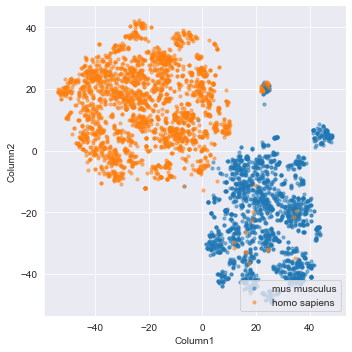

In [4]:
tsne.plot2d('../data/abYsis_bert_df.csv',source)

In [22]:
def plot2d(data, source, dims=2, perpx=100):

    df = pd.read_csv(data)
    Array2d = df.to_numpy()

    X_embedded = TSNE(n_components=dims, learning_rate='auto',
                      init ='random', perplexity=perpx).fit_transform(Array2d)

    dataset = pd.DataFrame({'Column1': X_embedded[:, 0], 'Column2': X_embedded[:, 1]})

    dataset['source'] = source

    sns.set_style("whitegrid", {'axes.grid' : False})

    tsne_plot = sns.lmplot(x="Column1", y="Column2", data=dataset, fit_reg=False, hue='source', legend=False,
                           scatter_kws={"s": 10,'alpha': 0.5})
    plt.legend(loc='lower right')
    plt.show()

    return tsne_plot.figure.savefig("TSNE_plot_per50.png", bbox_inches='tight')

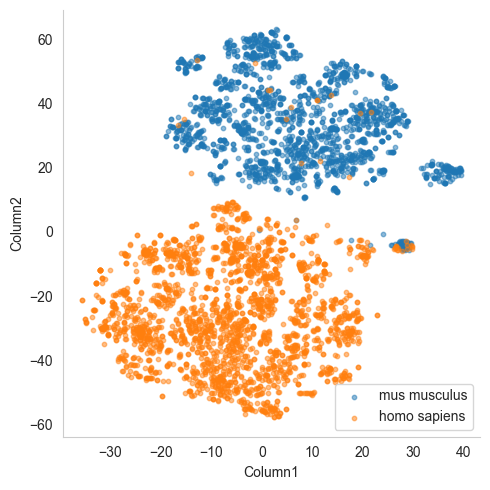

In [23]:
plot2d('../data/abYsis_bert_df.csv',source)

In [11]:
data72 = pd.read_csv('../data/combined_datasets_72.csv')

def select_columns(X):
    # Replace this list with the names of the columns you want to select
    selected_features = data72.columns
    X.columns = ['{}'.format(i) for i in range(len(X.columns))]
    X_new = X[selected_features]
    X_new.columns = ['{}'.format(i) for i in range(len(X_new.columns))]
    return X_new

abY_bert_reduced_df = select_columns(abysis_berty_df)

In [20]:

def plot2d(data, source, dims=2, perpx=100):

    Array2d = data.to_numpy()

    X_embedded = TSNE(n_components=dims, learning_rate='auto',
                      init='random', perplexity=perpx).fit_transform(Array2d)

    dataset = pd.DataFrame({'Column1': X_embedded[:, 0], 'Column2': X_embedded[:, 1]})

    dataset['source'] = source

    sns.set_style("whitegrid", {'axes.grid' : False})

    tsne_plot = sns.lmplot(x="Column1", y="Column2", data=dataset, fit_reg=False, hue='source', legend=False,
                           scatter_kws={"s": 10, 'alpha': 0.5})
    plt.legend(loc='lower right')
    plt.show()

    return tsne_plot.figure.savefig("TSNE_plot_per50.png", bbox_inches='tight')

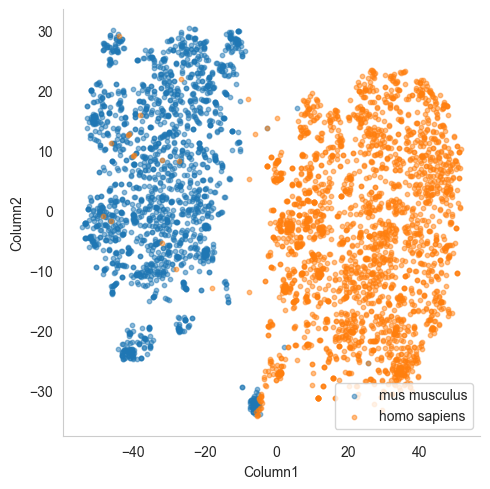

In [21]:
plot2d(abY_bert_reduced_df,source)

In [13]:
abY_bert_reduced_df

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,150.734760,-1.429909,-88.657120,-47.829390,-154.085770,17.219220,-3.618436,-11.119471,80.490654,93.510120,...,384.94672,53.054035,-11.763147,-9.972216,18.321579,-25.560791,-6.854883,-119.697495,0.398846,46.869390
1,212.380660,-41.452564,68.422630,27.771410,-130.201170,-29.938305,26.521590,35.617160,52.429520,-13.990732,...,220.36493,14.879402,-31.924635,4.472650,19.171612,-35.572582,81.915825,-101.625210,-30.992832,114.938220
2,254.164200,-118.831610,149.221120,-27.051546,-10.311674,-54.871193,53.080414,13.844803,52.011543,48.133300,...,187.61296,117.697800,5.677790,-54.326897,17.858932,-49.773820,118.371180,-47.839424,3.346790,55.376270
3,173.167800,-48.315350,92.455124,105.444534,-48.875900,79.170270,1.144156,-25.384361,73.841255,-32.665737,...,263.88270,164.422500,78.385510,-180.512770,-62.740580,-14.722496,4.480755,-168.107210,61.714380,185.749730
4,109.009575,-67.968480,66.418510,-46.441105,-28.688555,3.372197,-24.213064,-90.982480,31.498436,-2.943020,...,116.04585,-1.826634,-97.193695,-53.277664,-33.357040,-57.070656,14.247761,-54.213905,-55.562237,95.312680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,143.607420,-81.559830,32.871650,-91.955025,-228.294850,91.917020,-95.335320,78.959724,65.465230,118.718925,...,399.36224,10.122396,-17.592072,53.438477,38.914530,-29.263180,-37.851665,8.663022,-27.461903,130.789300
4395,144.681210,-103.723274,51.151367,-152.875640,-138.904630,119.548420,-39.008380,63.154360,74.929330,172.189000,...,347.73270,83.608430,-19.210241,16.746685,42.693220,-23.806911,-52.396767,-5.888241,-100.716530,101.362040
4396,46.733820,163.200880,-5.433272,156.995940,-126.367110,-5.031398,44.603620,-75.936905,-24.057276,11.263302,...,170.58540,-14.252799,-136.248660,8.110908,-248.088380,79.813290,-78.490440,-197.613240,190.705780,212.826520
4397,57.689224,-15.253461,-91.460370,91.483010,-82.676620,115.969086,-35.290375,-115.982610,136.715260,-15.046064,...,293.28607,-11.820562,-15.988316,-130.689100,-50.171696,-16.335094,-35.008884,-0.807268,-116.496440,-21.481022
